Loading Dependencies:

In [69]:
import pandas as pd
import numpy as np
import os
import cv2 as cv 
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential

Importing the data:

In [52]:
# All the folders in the training directory
categories = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
train_dir = "./data/Training/"
test_dir = "./data/Testing/"

# Initialize image size
IMG_SIZE = 300

# Initialize lists
training_data = []
test_data = []

# Function to label the image arrays
def create_data(data_list, directory):
    # Loop over the folders (categories)
    for i, category in enumerate(categories):
        # Join the paths
        path = os.path.join(directory, category)
        # Read individual images
        for img in os.listdir(path):
            img_array = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
            resized_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data_list.append([resized_array, str(category)])


# Creating the labelled images
create_data(training_data, train_dir)
create_data(test_data, test_dir)

# Print the length
len(training_data)
len(test_data)

394

Shuffle the data since otherwise the neural network doesn't learn very well:

In [53]:
random.shuffle(training_data)
random.shuffle(test_data)

Create the training Y & X:

In [54]:
X_train = []
y_train = []
X_test = []
y_test = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)


for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

# Reshaping the images
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


As can be seen here it can be quite hard to distuingish between tumors for an untrained eye, while some others can be more easily spotted. Seems like a good case for machine learning:

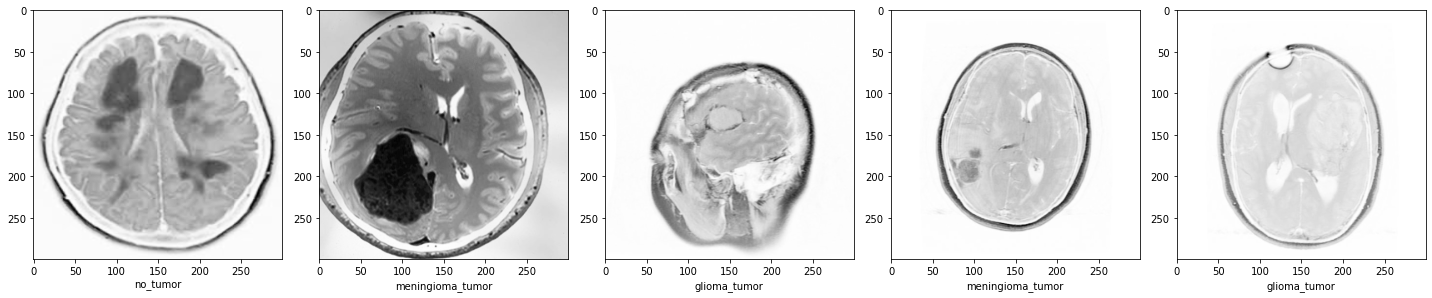

In [66]:
plt.figure(figsize = (20,20));
for i,j in enumerate(X_train):
    if i<5:
        plt.subplot(1,5,i+1)
        plt.imshow(j, cmap="Greys");
        plt.xlabel(y_train[i]);
        plt.tight_layout()
    else:
        break

# Building the Neural Network

In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(kernel_size = (5,5), filters = 32, activation ="relu", padding = "same"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(),
    tf.keras.layers.Dropout(),
    tf.keras.layers.Dense(4, activation = "softmax")
])